In [1]:
import matplotlib.pyplot as plt
import numpy as np
from librosa.feature import chroma_stft
import librosa
import json

In [6]:
# Plots the likelihood distributions for a key in a given mood
def key_distribution(chromagram, title, mode='major'):
    # use chromograms and short time fourier transform
    chroma_matrix = np.matrix(chromagram).T
    path = f"../key_profiles/{mode}.json"

    with open(path) as f:
        scales = json.load(f)
        similarities = {}
        for key in scales:
            profile = np.matrix(scales[key]).T
            score = np.mean(chroma_matrix * profile)
            similarities[key] = score

    sorted_similarties = sorted(similarities.items(), key=lambda x: x[1])
    sorted_array = np.array(sorted_similarties)

    notes  = sorted_array[:, 0]
    scores = sorted_array[:, 1].astype(float)

    plt.bar(notes, scores)
    plt.title(f"Key Scores for {title} in the {mode.capitalize()} Mode")
    plt.xlabel(f"{mode.capitalize()} Scales")
    plt.ylabel("Score")

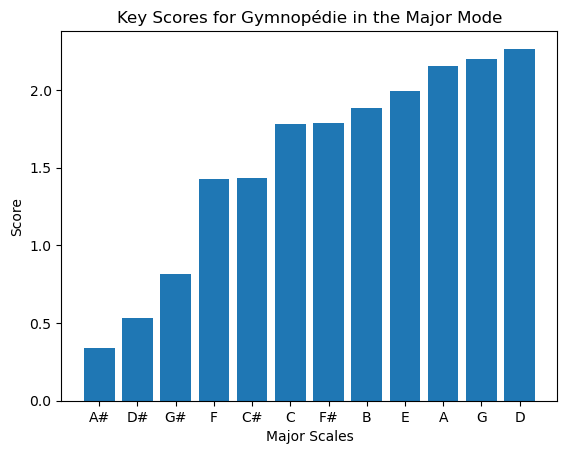

In [7]:
# load in the music
y, sr = librosa.load("../wav_songs/Satie - Gymnopédie No 1 Modified.wav")

# construct a chromagram
chromagram = chroma_stft(y=y, sr=sr)

# plotting the key distribution in the major mode
key_distribution(chromagram, title="Gymnopédie", mode='major')

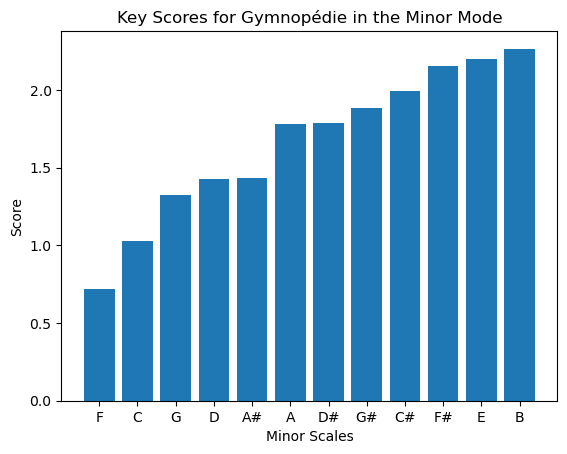

In [8]:
# plotting the key distribution in the minor mode
key_distribution(chromagram, title="Gymnopédie", mode='minor')